In [1]:
import numpy as np
import classy as cl
from classy import Class
import matplotlib.pyplot as plt
import pickle
#import derivatives as dv
pi=np.pi

from scipy.integrate import quad
from scipy import integrate
import time
from scipy.interpolate import interp1d
hbar=6.58*10**(-16)  # eV s units
eq=0.302 # electric charge
alpha=eq**2/(4*np.pi)
Mpl=2.435*10**(18)
c=2.998*10**5 #km/s
ccm=2.998*10**(10) #cm/s

############ Rewritten to be in h / Mpc Units #####################



h=.678
OmegaL=0.692
OmegaM=0.308
H100=100/(3.086*10**(19.))*hbar  # 100 km/s/Mpc *(1 Mpc/3.086*10^19 km) * hbar(s eV) -> eV
rhoc = 3*((Mpl*10**(9))**2)*(h**2)*(H100**2) #in eV^(4), need to convert Mpl in GeV to eV
kB= 8.617*10**(-5) #boltzmann's constant in eV / K
Tgamma=2.725*kB
rhogamma= 2*(np.pi**2)*(Tgamma**4)/(30.)
OmegaR=rhogamma/rhoc

Stepsize = {
    'A_s': 0.1e-9,
    'n_s': 0.01,
    '100*theta_s': 0.005,
    'omega_b': 0.0008,
    'omega_cdm': 0.003,
    'tau_reio':0.02,
    'N_ur':0.03}

def H(a):
    return h*H100*np.sqrt(OmegaR*a**(-4) + OmegaM*a**(-3)+OmegaL)/hbar
def HMpc(a):
    return h*100*np.sqrt(OmegaR*a**(-4) + OmegaM*a**(-3)+OmegaL)  # returns H(a)  in km/s / Mpc

Spheredeg2=360**2/pi

def ztoa(z):
    return 1./(1.+z)

def distanceMpc(z):
    temp=quad(lambda x:1/(x*x*HMpc(x)),ztoa(z),1)[0]
    return temp*3*10.**(5.)*h
#return temp*3*10.**(5.)

def shell(z,Deltaz):
    temp=quad(lambda x:1/(x*x*HMpc(x)),ztoa(z+Deltaz),ztoa(z))[0]
    return temp*3*10.**(5.)*h
#return temp*3*10.**(5.)

def shellV(z,Deltaz,deg2):
    return 4*pi*shell(z,Deltaz)*distanceMpc(z)**2*deg2/Spheredeg2

def Dt(z):
    temp1=quad(lambda x:1/((x*HMpc(x)/100.)**3),0.0001,ztoa(z))[0]
    temp2=quad(lambda x:1/((x*HMpc(x)/100.)**3),0.0001,1)[0]
    return (temp1/temp2)*(HMpc(ztoa(z))/HMpc(1.))

def Dta(a):
    temp1=quad(lambda x:1/((x*HMpc(x)/100.)**3),0.0001,a)[0]
    temp2=quad(lambda x:1/((x*HMpc(x)/100.)**3),0.0001,1)[0]
    return (temp1/temp2)*(HMpc(a)/HMpc(1.))


def ng_z_bins(deg2,zmax,Nobs,z_space=0.1):
    z_bins=np.arange(z_space,zmax,z_space)
    ng_bins={}
    vol_tot=0
    for z in z_bins:
        vol_tot+=shellV(z,z_space,deg2)
    for z_j in z_bins:
        ng_bins[z_j]=Nobs/vol_tot
    return z_bins,ng_bins,vol_tot

In [2]:
def partition(deg2, z_min, z_max, dz, num_gal):
    Spheredeg2=360**2/pi
    frac_sky = deg2/Spheredeg2
    z_bins = np.arange(z_min, z_max + dz, dz) # +dz makes it inclusive
    vol_bins = np.zeros(len(z_bins))
    gal_bins = np.zeros(len(z_bins))

    vol = 0
    for z, i in zip(z_bins, range(len(z_bins))):
        vol_bins[i] = shellV(z, dz, deg2)
        vol += vol_bins[i]
        #Units of Mpc/h
    print(vol)
    gal_den = num_gal/vol
    
    #this calculates the number of galaxies needed to be in each bin, so that the galaxy densities are the
    #same in each bin (this is an approximation)
    for i in range(len(gal_bins)):
        gal_bins[i] = gal_den*vol_bins[i]

    return z_bins, vol_bins, gal_bins


In [3]:
partition(10000, 0.05, 0.75, 0.1, 1.4e6)

7237301921.031078


(array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75]),
 array([1.91303145e+07, 1.55564384e+08, 3.88378266e+08, 6.81511131e+08,
        1.00599327e+09, 1.33993188e+09, 1.66774420e+09, 1.97904849e+09]),
 array([  3700.61117498,  30092.72523355,  75128.7673008 , 131833.04956786,
        194601.60533628, 259199.44334037, 322612.19699248, 382831.60105368]))

In [59]:
shellV(0.05,0.1,10000)/1e9+shellV(0.15,0.1,10000)/1e9+shellV(0.25,0.1,10000)/1e9+shellV(0.35,0.1,10000)/1e9+shellV(0.45,0.1,10000)/1e9+shellV(0.55,0.1,10000)/1e9+shellV(0.65,0.1,10000)/1e9+shellV(0.75,0.1,10000)/1e9


7.237301921031082

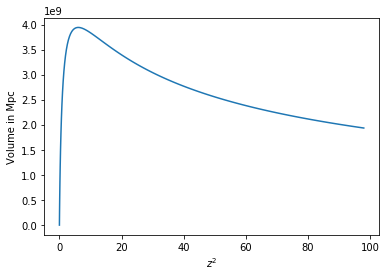

In [11]:
x = np.arange(0,10,0.1)
y = [shellV(z, 0.1, 10000) for z in x]
x = x**2
fig = plt.figure()
plt.plot(x,y)
plt.xlabel('$z^2$')
plt.ylabel('Volume in Mpc')


fig.savefig('volume_bins.pdf', bbox_inches='tight')

In [56]:
1/(1+0.5+0.05)

0.6451612903225806

In [57]:
1/(1+0.5)

0.6666666666666666